In [ ]:
import pandas as pd
import sqlite3
import kagglehub

In [ ]:

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


In [ ]:
# Load dataset CSV - update filename if different
csv_file = f"{path}/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(csv_file)

In [ ]:
# Display first few rows to understand structure (optional print)
print("Sample data from dataset:")
print(df.head())

Sample data from dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  

In [ ]:
# Create SQLite connection
Conn = sqlite3.connect('ibm_hr_analytics.db')

In [ ]:
# Load raw data into SQL table
df.to_sql('raw_hr_data', Conn, if_exists='replace', index=False) # Changed conn to Conn

1470

In [ ]:
# Create SQLite connection
Conn = sqlite3.connect('ibm_hr_analytics.db')

# ... other code ...

# Use Conn instead of conn to create the cursor
cursor = Conn.cursor()

In [ ]:
# Create cleaned table with removal of duplicates (if any)
cursor.execute('''
CREATE TABLE temp_hr_data AS
SELECT DISTINCT * FROM raw_hr_data;
''')

In [ ]:
# Remove records with missing values in crucial columns such as 'Age', 'Attrition' (adjust columns if needed)
cursor.execute('''
DELETE FROM temp_hr_data
WHERE Age IS NULL OR Attrition IS NULL;
''')

In [ ]:
# Optional: Remove records with impossible or outlier values (example: Age < 18 or Age > 65)
cursor.execute('''
DELETE FROM temp_hr_data
WHERE Age < 18 OR Age > 65;
''')

In [ ]:
# Optional: Remove records with negative or zero 'MonthlyIncome'
cursor.execute('''
DELETE FROM temp_hr_data
WHERE MonthlyIncome <= 0;
''')

In [ ]:
# If there is a date column, standardize date formats - check for a 'Date' column (not typical in this dataset)
# For this dataset, there is typically no date column, so skip this step.

In [ ]:
# Create final cleaned table
cursor.execute('''
CREATE TABLE cleaned_hr_data AS
SELECT * FROM temp_hr_data;
''')

In [ ]:
# Drop temporary table
cursor.execute('DROP TABLE temp_hr_data;')

In [ ]:
Conn.commit() # Change conn to Conn to match the connection variable name

In [ ]:
# Load cleaned data into pandas for verification
cleaned_df = pd.read_sql_query('SELECT * FROM cleaned_hr_data', Conn) # Changed conn to Conn

In [ ]:
print("Cleaned data sample:")
print(cleaned_df.head())

Cleaned data sample:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  Stock

In [ ]:
# Calculate or assign a value to RESULT before using it.
# For example, if RESULT should store the number of rows in cleaned_df:
RESULT = len(cleaned_df)

# Now you can use RESULT
print(RESULT)

1470


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connect to SQLite database
conn = sqlite3.connect('ibm_hr_analytics.db')
# Load cleaned data
df = pd.read_sql_query('SELECT * FROM cleaned_hr_data', conn)
conn.close()

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

<ipython-input-34-f94d1cc96ac3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


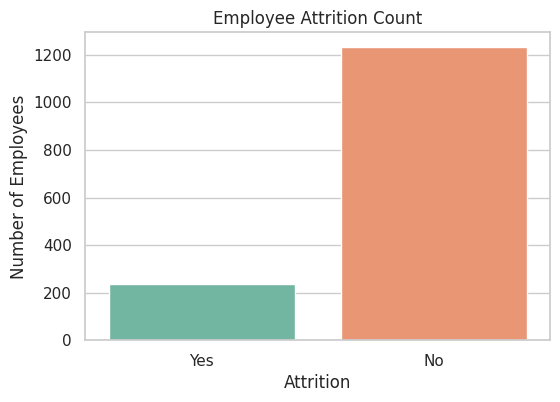

In [ ]:
# 1. Attrition Count Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

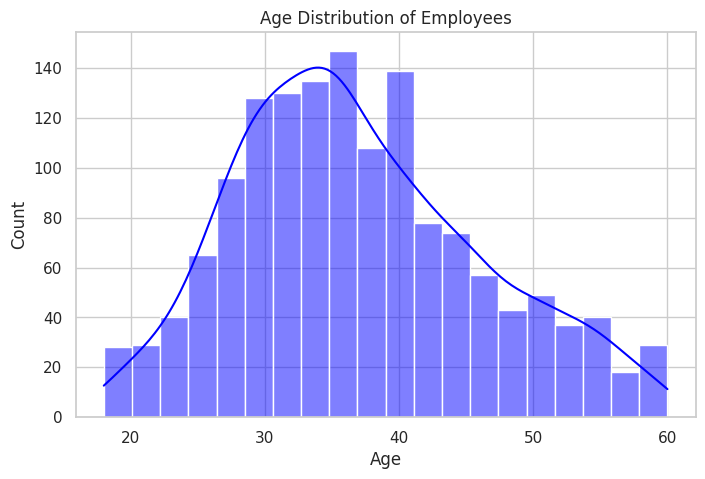

In [ ]:
# 2. Age Distribution Plot
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

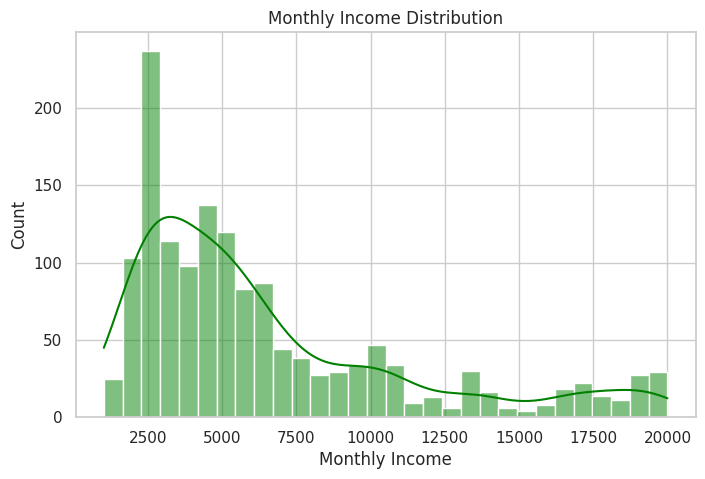

In [ ]:
# 3. Monthly Income Distribution Plot
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='green')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

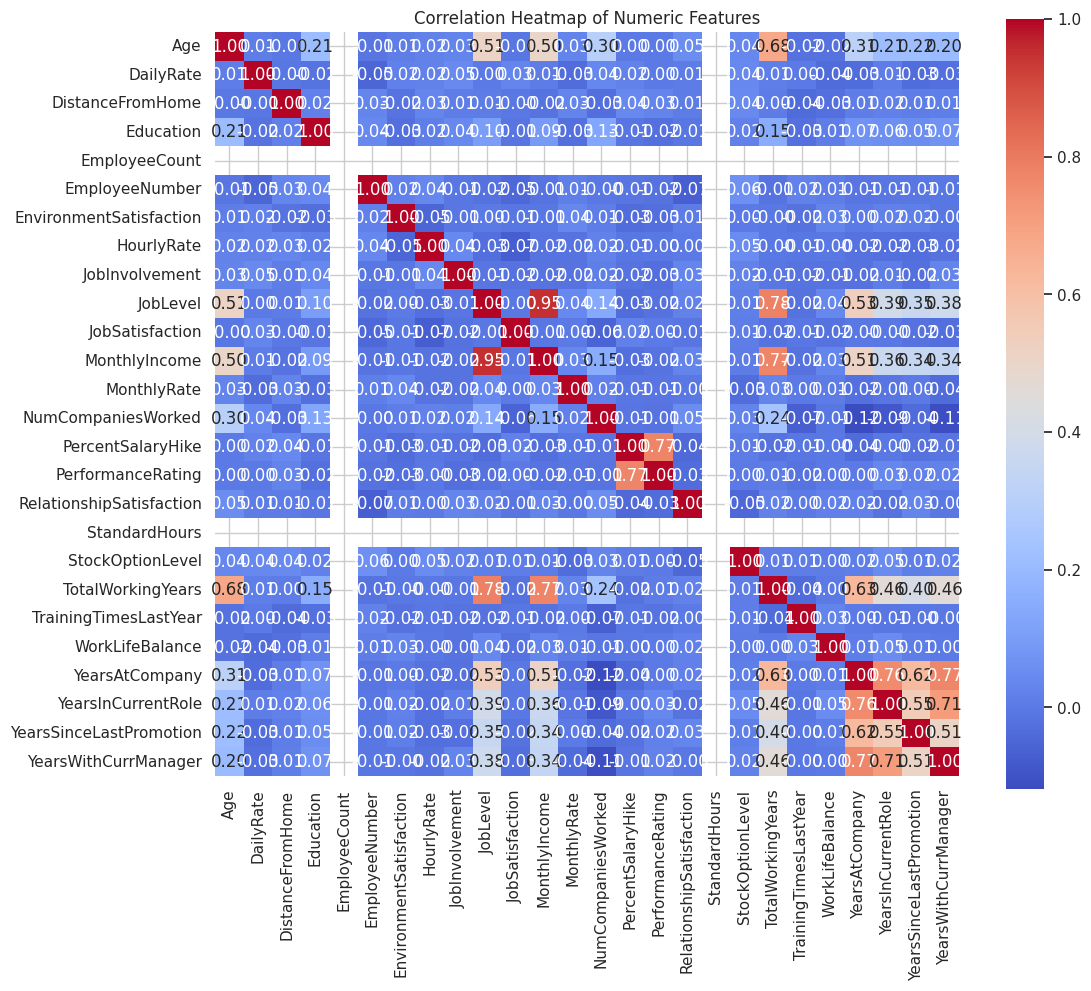

In [ ]:
# 4. Correlation Heatmap of Numeric Features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
import sqlite3
import csv

In [ ]:
# Path to SQLite database
db_path = 'ibm_hr_analytics.db'
# Output CSV file path
csv_path = 'cleaned_ibm_hr_analytics.csv'

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [ ]:
# Execute query to fetch all cleaned data
cursor.execute("SELECT * FROM cleaned_hr_data")
# Fetch all rows
rows = cursor.fetchall()

In [ ]:
# Get column names from cursor description
column_names = [description[0] for description in cursor.description]

In [ ]:
# Write data to CSV file
with open(csv_path, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    # Write the header
    writer.writerow(column_names)
    # Write all data rows
    writer.writerows(rows)

In [ ]:
# Clean up
cursor.close()
conn.close()
print(f"Exported {len(rows)} records to {csv_path}")

Exported 1470 records to cleaned_ibm_hr_analytics.csv


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('ibm_hr_analytics.db')

# Read the cleaned data table into a DataFrame
df_cleaned = pd.read_sql_query("SELECT * FROM cleaned_hr_data", conn)

# Close the connection
conn.close()

# Export to CSV file
csv_file_path = 'cleaned_ibm_hr_analytics.csv'
df_cleaned.to_csv(csv_file_path, index=False)

print(f"Cleaned data exported successfully to: {csv_file_path}")

# If in Jupyter notebook and want to provide a download link:
try:
    from IPython.display import FileLink
    display(FileLink(csv_file_path))
except ImportError:
    pass

Cleaned data exported successfully to: cleaned_ibm_hr_analytics.csv


/content/cleaned_ibm_hr_analytics.csv

In [ ]:
import sqlite3
import pandas as pd
from google.colab import files

# Connect to SQLite database (assuming 'ibm_hr_analytics.db' is in your Colab environment)
conn = sqlite3.connect('ibm_hr_analytics.db')

# Read cleaned data
df_cleaned = pd.read_sql_query("SELECT * FROM cleaned_hr_data", conn)

# Close connection
conn.close()

# Save to CSV file in Colab environment
csv_filename = 'cleaned_ibm_hr_analytics.csv'
df_cleaned.to_csv(csv_filename, index=False)

# Download the CSV file to your local machine
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>